# **Melbourne Housing Market || Data Analysis**

![](https://storage.googleapis.com/kaggle-datasets-images/423/882/852dacdbc4afbe97e5367795ad6606bd/dataset-cover.jpg)

## Global AI Hub

Global AI Hub is one of the globally leading AI communities with reach to young AI talents, AI professionals, experts and AI enthusiast around the world.

(https://www.globalaihub.com/ || https://10million.ai/)

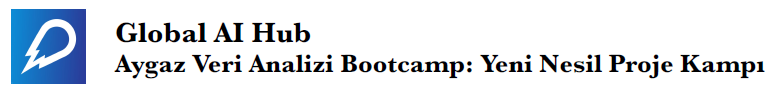

### Final Project of Bootcamp

**Definition :** 
This study is a graduation project organized for the Aygaz data analysis bootcamp (new generation project camp) carried out by the Global AI Hub.

**Project Scope :**
* Dataset selection
* Development Environments (Kaggle & Github)
* Exploratory Data Analysis (EDA)
* Data Cleaning and Preprocessing
* Statistical Analysis & Visualization
* Conclusion and Recommendations

## Introduction

### Data Set Information :

This is a dataset that contains sales data for houses in Melbourne. This dataset provides various features to estimate or analyze house prices. The dataset consists of rows that contain various features and sales conditions for each house.

Here are the main features:

**House Prices (Price):** The sales price of each house (**target variable**).

**House Features:** Features such as house type (apartment or house), number of rooms, number of bathrooms, number of bedrooms, vehicle capacity.

**Location:** The neighborhood (Suburb) where the houses are located, address and postcode.

**Building and Land Features:** Information such as building area, lot size, year of construction.

**Sales Method:** The method of the sales transaction (e.g. auction, direct sale).

**Seller and Local Government:** Sellers of houses and local government areas.



**Dataset Link :** https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

## Libraries

In [ ]:
# for data analysis
import numpy as np
import pandas as pd
import random

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# accessing directory structure
import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# for disable all alerts
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

##### Note : There are 2 csv files in the current version of the dataset. I chose the dataset with the largest data size, which is "Melbourne_House_prices_less".

In [ ]:
data = pd.read_csv("/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv")

## Exploratory Data Analysis [EDA]

### 1. First Informations

In [ ]:
data.shape # Dimension of dataset

In [ ]:
print(data.columns) # Columns of data set

**Dataset Columns Descriptions :**

**1. Suburb:** The name of the suburb where the house is located. This is a categorical variable representing different suburbs in Melbourne. 

**2. Address:** The full address of the house. This column provides the exact address of the property, but is often used together with other general location information like suburb name and postcode.

**3. Rooms:** The number of rooms in the house. This is a numerical variable that indicates the total number of rooms in the house.

**4. Type:** The type of property. This categorical variable indicates the type of dwelling (e.g., 'h' = house, 'u' = unit).

**5. Price:** The sale price of the house. This is the target variable, representing the price at which the house was sold.

**6. Method:** The method of sale. This categorical variable describes how the house was sold (e.g., 'S' = sold, 'SP' = sold via a private sale).

**7. SellerG:** The name of the real estate agent or group that sold the property. This column refers to the seller or the agency responsible for the sale.

**8. Date:** The sale date of the house. This column indicates the date on which the house was sold, typically in a date format.

**9. Postcode:** The postcode of the location where the house is situated. This is a numerical variable that further specifies the location of the house.

**10. Regionname:** The name of the region. This categorical variable indicates the broader geographic region in Melbourne in which the property is located.

**11. Propertycount:** The total number of properties in the suburb. This variable indicates how many properties are present in the particular suburb, which can help analyze property density and market saturation.

**12. Distance:** The distance of the house from the central Melbourne area. This numerical variable shows how far the house is from the city center, typically in kilometers.

**13. CouncilArea:** The local government area. This column indicates the local council or municipality that governs the area where the property is located. 

In [ ]:
data.dtypes

### 2. Creating Artificially Missing Values ​​in a Data Set

In [ ]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.02,
                              seed: random = 28) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

In [ ]:
df = add_random_missing_values(dataframe = data,missing_rate = 0.03)

### 3. Exploratory Analysis

In [ ]:
df.head(5) # first 5 records

In [ ]:
df.tail(5) # last 5 records

In [ ]:
df.info()

### 4. Data Types

**Note : Why should we convert to data type from object to category or string?**

**1. Memory Efficiency :** If the same text (such as neighborhood name or house type) is repeated many times in an object type column, converting this column to category data type allows you to use memory much more efficiently. Category data type stores unique values ​​(labels) in the column in a separate place and uses a numeric code corresponding to these unique values ​​in each repetition. In this way, instead of storing all the text, only a numeric value is stored in each row, which reduces memory usage.

**2. Performance Increase :** category data type performs operations such as grouping, sorting, filtering faster. Pandas works faster by optimizing operations performed with categorical data.

**3. Meaningful Data Representation :** If the column represents categorical data (such as neighborhood name, house type, sales method), converting it to category data type provides a more accurate representation of the data. This shows that the data represents a limited and specific set and clarifies the meaning of the data type.If the column represents categorical data (such as neighborhood name, house type, sales method), converting it to category data type provides a more accurate representation of the data. This shows that the data represents a limited and specific set and clarifies the meaning of the data type.

**4. Text Operations :** If the data is entirely text (string) (e.g. addresses, vendor names), using the string data type instead of object will provide more consistent and accurate results when performing text operations.

In [ ]:
df1 = df.copy() # let's create a copy for this step.

In [ ]:
def convert_data_type(p_data):
    # Detect all columns of type object in the dataset
    for column in p_data.select_dtypes(include=['object']).columns:
        # If the column contains categorical data, convert it to 'category' type
        if p_data[column].nunique() < p_data[column].shape[0] * 0.5:
            p_data[column] = p_data[column].astype('category')
        else:
            # If column is not categorical, convert to 'string' type
            p_data[column] = p_data[column].astype('string')
    return p_data

In [ ]:
df1 = convert_data_type(df1)

In [ ]:
df1.dtypes

In [ ]:
categorical_features = []
text_features = []
numerical_features = []

for col in df1.columns:
    if (df1[col].dtype == "category"):
        categorical_features.append(col)
    elif (df1[col].dtype == "string"):
        text_features.append(col)
    else:
        numerical_features.append(col)

In [ ]:
print(f"Categorical Features : {categorical_features} ")
print(f"Test Features : {text_features} ")
print(f"Numerical Features : {numerical_features} ")

### 5.Analysis of Missing Data

##### Note : By analyzing missing data, we aim to detect missing data in the data set and correct this situation appropriately.

In [ ]:
df2 = df1.copy() # let's create a copy for this step.

In [ ]:
df2.isna().sum() # number of missing values ​​for each variable

In [ ]:
df2.isna().sum().sum() # total number of missing values

In [ ]:
# The ratio of the missing values ​​of each variable to the total number of missing values
round((df2.isna().sum() / df2.isna().sum().sum())*100,2) 

In [ ]:
print(f"There are a total of {df2.notnull().sum().sum()} non-missing and {df2.isnull().sum().sum()} missing observations in the data set.")

### 6.Filling in Missing Data

In [ ]:
df3 = df2.copy() # let's create a copy for this step.

#### Numerical Data Filling

In [ ]:
print(numerical_features)

In [ ]:
to_be_filled = numerical_features[:]

for col in to_be_filled:
    df3[col].fillna(df2[col].mean(), inplace = True)

In [ ]:
df3.isna().sum()

#### Categorical Data Filling

In [ ]:
df4 = df3.copy()

In [ ]:
print(categorical_features)

In [ ]:
to_be_filled = categorical_features[:]

for col in to_be_filled:
    col_mode = df4[col].mode()
    df4[col] = df4[col].fillna(value = col_mode[0])

In [ ]:
df4.isna().sum()

#### Text Data Filling

In [ ]:
df5 = df4.copy()

In [ ]:
df5['Address'] = np.where(df5['Address'].isna(), df5['Regionname'], df5['Address'])

In [ ]:
df5.isna().sum()

## Conclusion

#### This dataset contains various information about the characteristics of houses in Melbourne. It can be used especially for price estimation, location analysis and market trends.

For example:
* Variables like Suburb and Distance allow you to examine the effect of location on house prices.
* Numerical variables like Rooms, Propertycount and Price can be used to perform value analysis based on house features.
* Categorical variables like Method, SellerG and CouncilArea allow you to understand the sales methods and seller information of houses.
* These columns allow you to make important inferences about the real estate market in Melbourne.